<center><h1>Yu_Liujia_HW6</h1></center>

Name: Liujia Yu
<br>
Github Username: LesleyYu
<br>
USC ID: 4764432021

## To grader:

**I choose to use one late day for this assignment**

## 1. Tree-Based Methods

Import packages

In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score, roc_auc_score
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import warnings
warnings.filterwarnings('ignore')

### (a) Download the APS Failure data

In [4]:
df_train = pd.read_csv(
    filepath_or_buffer="../../data/aps_failure/aps_failure_training_set.csv",
    skiprows=20, 
    na_values = 'na')
df_test = pd.read_csv(
    filepath_or_buffer="../../data/aps_failure/aps_failure_test_set.csv",
    skiprows=20, 
    na_values = 'na')
df_train = df_train.replace({'neg': 0, 'pos': 1, 'na':np.nan})
df_test = df_test.replace({'neg': 0, 'pos': 1, 'na':np.nan})
print("Training Data: ", df_train.shape)
print("Testing Data: ", df_test.shape)
df_train

Training Data:  (60000, 171)
Testing Data:  (16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


### (b) Data Preparation


##### * Notes (To Grader: You can ignore this)



Missing data imputation:
[Piazza link](https://piazza.com/class/m09cnglrrao1gr/post/763)

> "it's generally recommended to impute missing values separately for the training and test sets to maintain the independence of each set."
> 
> "I think in short what he is saying is for assignment either
> 
> A. Fit your imputer on train data and use same imputer to fill missing values for train and test
> 
> OR
> 
> B. Use 2 different imputers for train and test and fill their values with their corresponding imputers."


Dropping columns with a high percentage of missing data:
[Piazza link](https://piazza.com/class/m09cnglrrao1gr/post/770)

> Random Forests and Handling Missing Values:
>
> Feature Subsampling: Random Forests build each tree on a subset of features, so having more features allows each tree to explore different splits. This enhances diversity among the trees, which can improve the overall performance of the ensemble model.
>
> Robustness to Noisy Features: Random Forests are generally robust to some noisy or irrelevant features. By averaging results across many trees, the model reduces the impact of any one noisy feature.
>
> Missing Values:
>
> If the missing values are random, mean imputation can work well since it introduces minimal bias and keeps more features available for the model to use.
>
> If the missing values are systematic (e.g., missing for a specific subgroup), imputation might introduce bias. In this case, it could be worth testing the model’s performance with and without these features.
>
> Feature Correlation: If a feature with missing values is highly correlated with other features, it’s less likely to introduce additional noise because the model can still infer similar information from the correlated features. However, it’s always good practice to test if retaining or dropping these features improves model performance. 
>
> I'd start with not dropping columns because it is more time consuming but if you are really interested you should see for yourself ... as for the "When the number of data with missing values is significant, discarding them is not a good idea" to me this more about rows than columns here's a
>
>
> Practical Example
>
> Imagine you’re working with a medical dataset where each row is a patient, and each column is a type of medical measurement:
>
> If 20% of patients (rows) have some missing measurements, discarding those rows would mean losing 20% of your patient data, potentially reducing the sample size and altering the study's validity.
>
> However, if a specific measurement (column) is missing for 70% of patients, the remaining 30% might not provide enough reliable information for analysis. Dropping this column would simplify the dataset without a significant loss of information from the rest of the dataset. 

#### (i) Research what types of techniques are usually used

**References**:

[handle missing data python](https://machinelearningmastery.com/handle-missing-data-python/)

[pandas doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop)

1. Simple Methods:
   1. A constant value that has meaning within the domain, such as 0, distinct from all other values. This works for categorical features.
   2. A feature value from another randomly selected observation.
   3. most frequent value: A value that has the highest frequency in the column. This works also for numerical features.
2. calculation needed:
   1. A statistics such as mean, median or mode value of the feature/column. However it can only be used for numerical features.
3. value estimated by another predictive model:
   1. KNN regression classification
      (can be done in sklearn like KNNImputer. We assign a value to the missing feature by predicting like a new data point.)
   2. Linear Regression
4. When a lot of data has missing values (i.e. not  enough data without missing values for prediction of other missing values)
   1. An iterative method based on Expectation Maximization can be used: Round-Robin Data Imputation

In [5]:
# Calculate sum of missing values
missing_sum = pd.Series(df_train.isnull().sum())

# Create DataFrame with sum and percentage
df_missing = pd.DataFrame({
    'sum': missing_sum,
    'percentage': (missing_sum / len(df_train) * 100).round(2)
})

# Sort values by percentage
df_missing = df_missing.sort_values('percentage', ascending=False)
# Add % symbol
df_missing['percentage'] = df_missing['percentage'].astype(str) + '%'

print("Missing values analysis:")
print(df_missing.head(20))

Missing values analysis:
          sum percentage
br_000  49264     82.11%
bq_000  48722      81.2%
bp_000  47740     79.57%
ab_000  46329     77.22%
cr_000  46329     77.22%
bo_000  46333     77.22%
bn_000  44009     73.35%
bm_000  39549     65.92%
bl_000  27277     45.46%
bk_000  23034     38.39%
ch_000  14861     24.77%
co_000  14861     24.77%
cg_000  14861     24.77%
cf_000  14861     24.77%
ad_000  14861     24.77%
ct_000  13808     23.01%
cu_000  13808     23.01%
cv_000  13808     23.01%
cx_000  13808     23.01%
cy_000  13808     23.01%


From the above table we can see there are several features that have high percentage of missing values. I decided to **remove** the features with missing values above **70%** of the whole training data.

For the rest features, I decided to use the **mean** value to replace the missing values.

In [6]:
# remove features (missing > 70%)
features_dropped = df_missing.head(7).index.tolist()
df_train_dropped = df_train.drop(features_dropped, axis=1)
print("training data shape after dropping cols: ", df_train_dropped.shape)
# do the same to test data
df_test_dropped = df_test.drop(features_dropped, axis=1)
print("test data shape after dropping cols: ", df_test_dropped.shape)

# impute missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = KNNImputer(n_neighbors=4)   # taking forever. Not appropriate, too many missing values
df_train_imp = pd.DataFrame(imputer.fit_transform(df_train_dropped), columns=df_train_dropped.columns)
df_test_imp = pd.DataFrame(imputer.fit_transform(df_test_dropped), columns=df_test_dropped.columns)
df_train_imp

training data shape after dropping cols:  (60000, 164)
test data shape after dropping cols:  (16000, 164)


,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,153002.0,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,0.0,2286.0,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,112.0,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,0.0,80292.0,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

calculate CV(coeﬃcient of variation) for:
1. one for all the datasets together. 
2. one for training set
3. one for test set.
   
[Piazza link](https://piazza.com/class/m09cnglrrao1gr/post/760)

In [7]:
def calculate_coef_of_Variation(df):
    Xs = df.iloc[:, 1:]    # all the features
    summary = Xs.describe()
    CV = summary.loc['std']/summary.loc['mean']
    print(CV)
    return CV

# Calculation on the Training data set
print("\nResult for Training data:")
CV_train = calculate_coef_of_Variation(df_train_imp)
# Calculation on the Test data set
print("\nResult for Test data:")
CV_test = calculate_coef_of_Variation(df_test_imp)
# Calculation on the whole data set
print("\nResult for whole data data:")
df_combined = pd.concat([df_train_imp, df_test_imp])
CV = calculate_coef_of_Variation(df_combined)


Result for Training data:
aa_000      2.450938
ac_000      2.169767
ad_000    183.847620
ae_000     23.190937
af_000     18.658921
             ...    
ee_007      4.962483
ee_008      3.222010
ee_009      5.626979
ef_000     47.124953
eg_000     40.553250
Length: 163, dtype: float64

Result for Test data:
aa_000     7.405254
ac_000     2.159811
ad_000     3.059255
ae_000    17.984377
af_000    16.046953
            ...    
ee_007     4.593464
ee_008     3.698411
ee_009     6.188841
ef_000    50.690401
eg_000    57.661381
Length: 163, dtype: float64

Result for whole data data:
aa_000      4.328608
ac_000      2.167648
ad_000    206.786809
ae_000     22.293998
af_000     18.209361
             ...    
ee_007      4.885086
ee_008      3.335019
ee_009      5.753917
ef_000     47.925135
eg_000     45.648516
Length: 163, dtype: float64


#### (iii) Plot a correlation matrix

Plot CM for:

1. one for training set
2. one for test set.
   
[Piazza link](https://piazza.com/class/m09cnglrrao1gr/post/763)

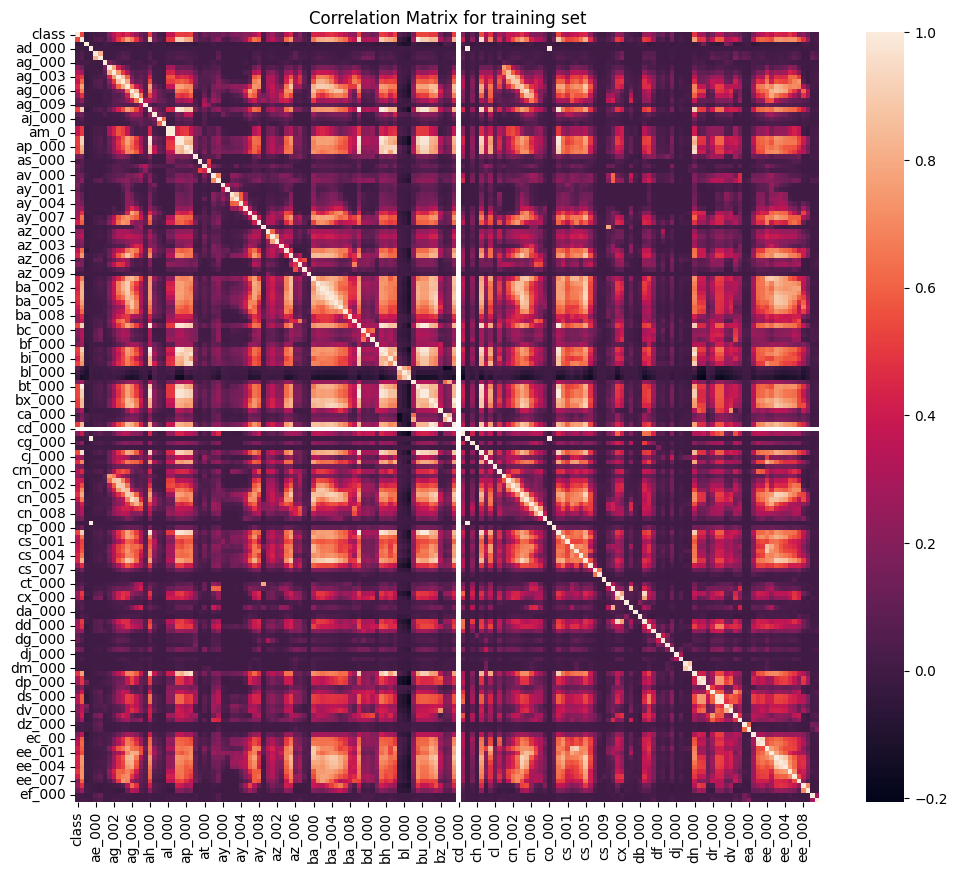

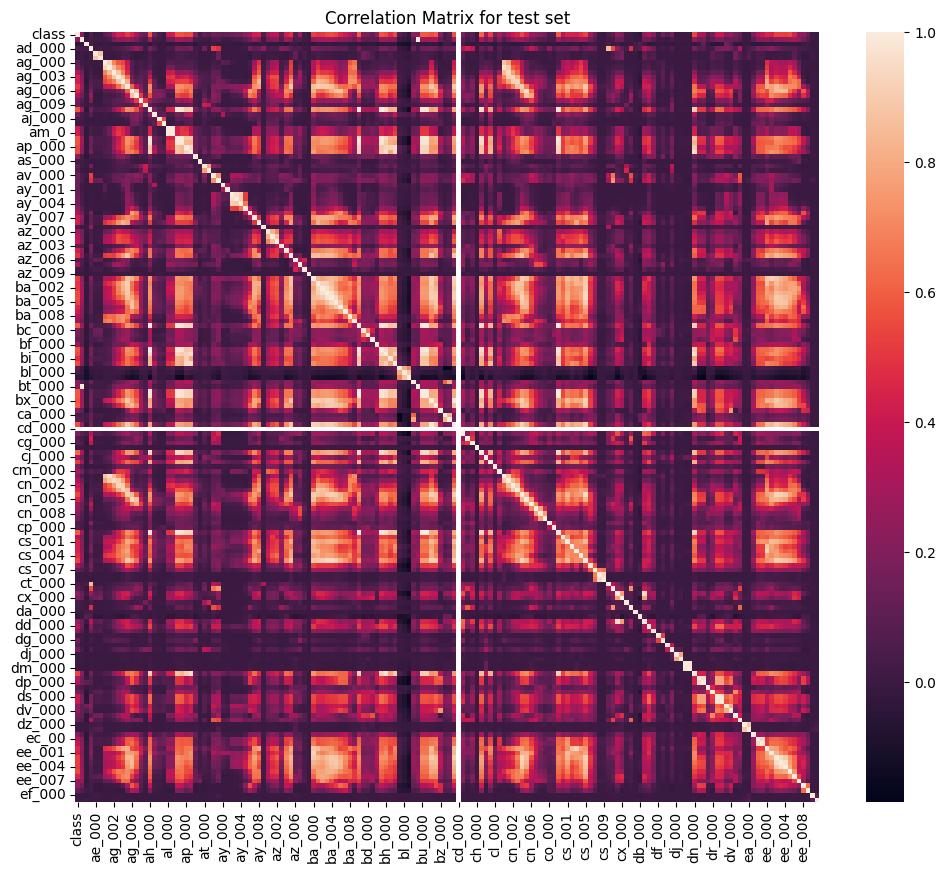

In [8]:
# correlation matrix
correlation_matrix_train = df_train_imp.corr()  # for training set
correlation_matrix_test = df_test_imp.corr()  # for test set
correlation_matrix = df_combined.corr()  # for whole data set

#plotting the heatmap for training set
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_train)
plt.title("Correlation Matrix for training set")
plt.show()

#plotting the heatmap for test set
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_test)
plt.title("Correlation Matrix for test set")
plt.show()

#### (iv) Make scatter plots and box plots

In [9]:
# m: number of features to be selected
m = math.floor(math.sqrt(170))  # m = 13
top_features_train = CV_train.sort_values(ascending=False).head(m)
top_features_test = CV_test.sort_values(ascending=False).head(m)
top_features = CV.sort_values(ascending=False).head(m)

# display
display(pd.DataFrame(top_features, columns=['cv(whole)']))
display(pd.DataFrame(top_features_train, columns=['cv(train)']))
display(pd.DataFrame(top_features_test, columns=['cv(test)']))

# compare to see if the selected features are the same for training and the whole set
top_features = set(top_features.index.tolist())
top_features_train = set(top_features_train.index.tolist())
print(len( (top_features).intersection(top_features_train) ))
print("features selected only in training set: ", top_features - top_features_train)
print("features selected only in whole data set: ", top_features_train - top_features)

,cv(whole)
cf_000,207.335930
co_000,206.941549
ad_000,206.786809
cs_009,192.498194
dj_000,122.169994
as_000,113.895899
dh_000,112.666588
df_000,111.279258
ag_000,91.465520
au_000,86.090347


,cv(train)
cs_009,235.277605
cf_000,184.233092
co_000,183.949017
ad_000,183.847620
dh_000,114.984991
dj_000,109.647285
ag_000,91.878565
as_000,86.416904
ay_009,83.786063
az_009,76.967978


,cv(test)
cs_009,124.657832
ak_000,93.713367
au_000,84.533732
as_000,82.363040
df_000,72.762421
cs_008,62.520871
az_009,59.670134
eg_000,57.661381
ch_000,54.853846
ag_000,53.090357


12
features selected only in training set:  {'df_000'}
features selected only in whole data set:  {'ch_000'}


We can see that there is not much difference in the selecteed features between the training set and the whole data set. So to avoid data leackage, I will use the features selected by the **training** set.

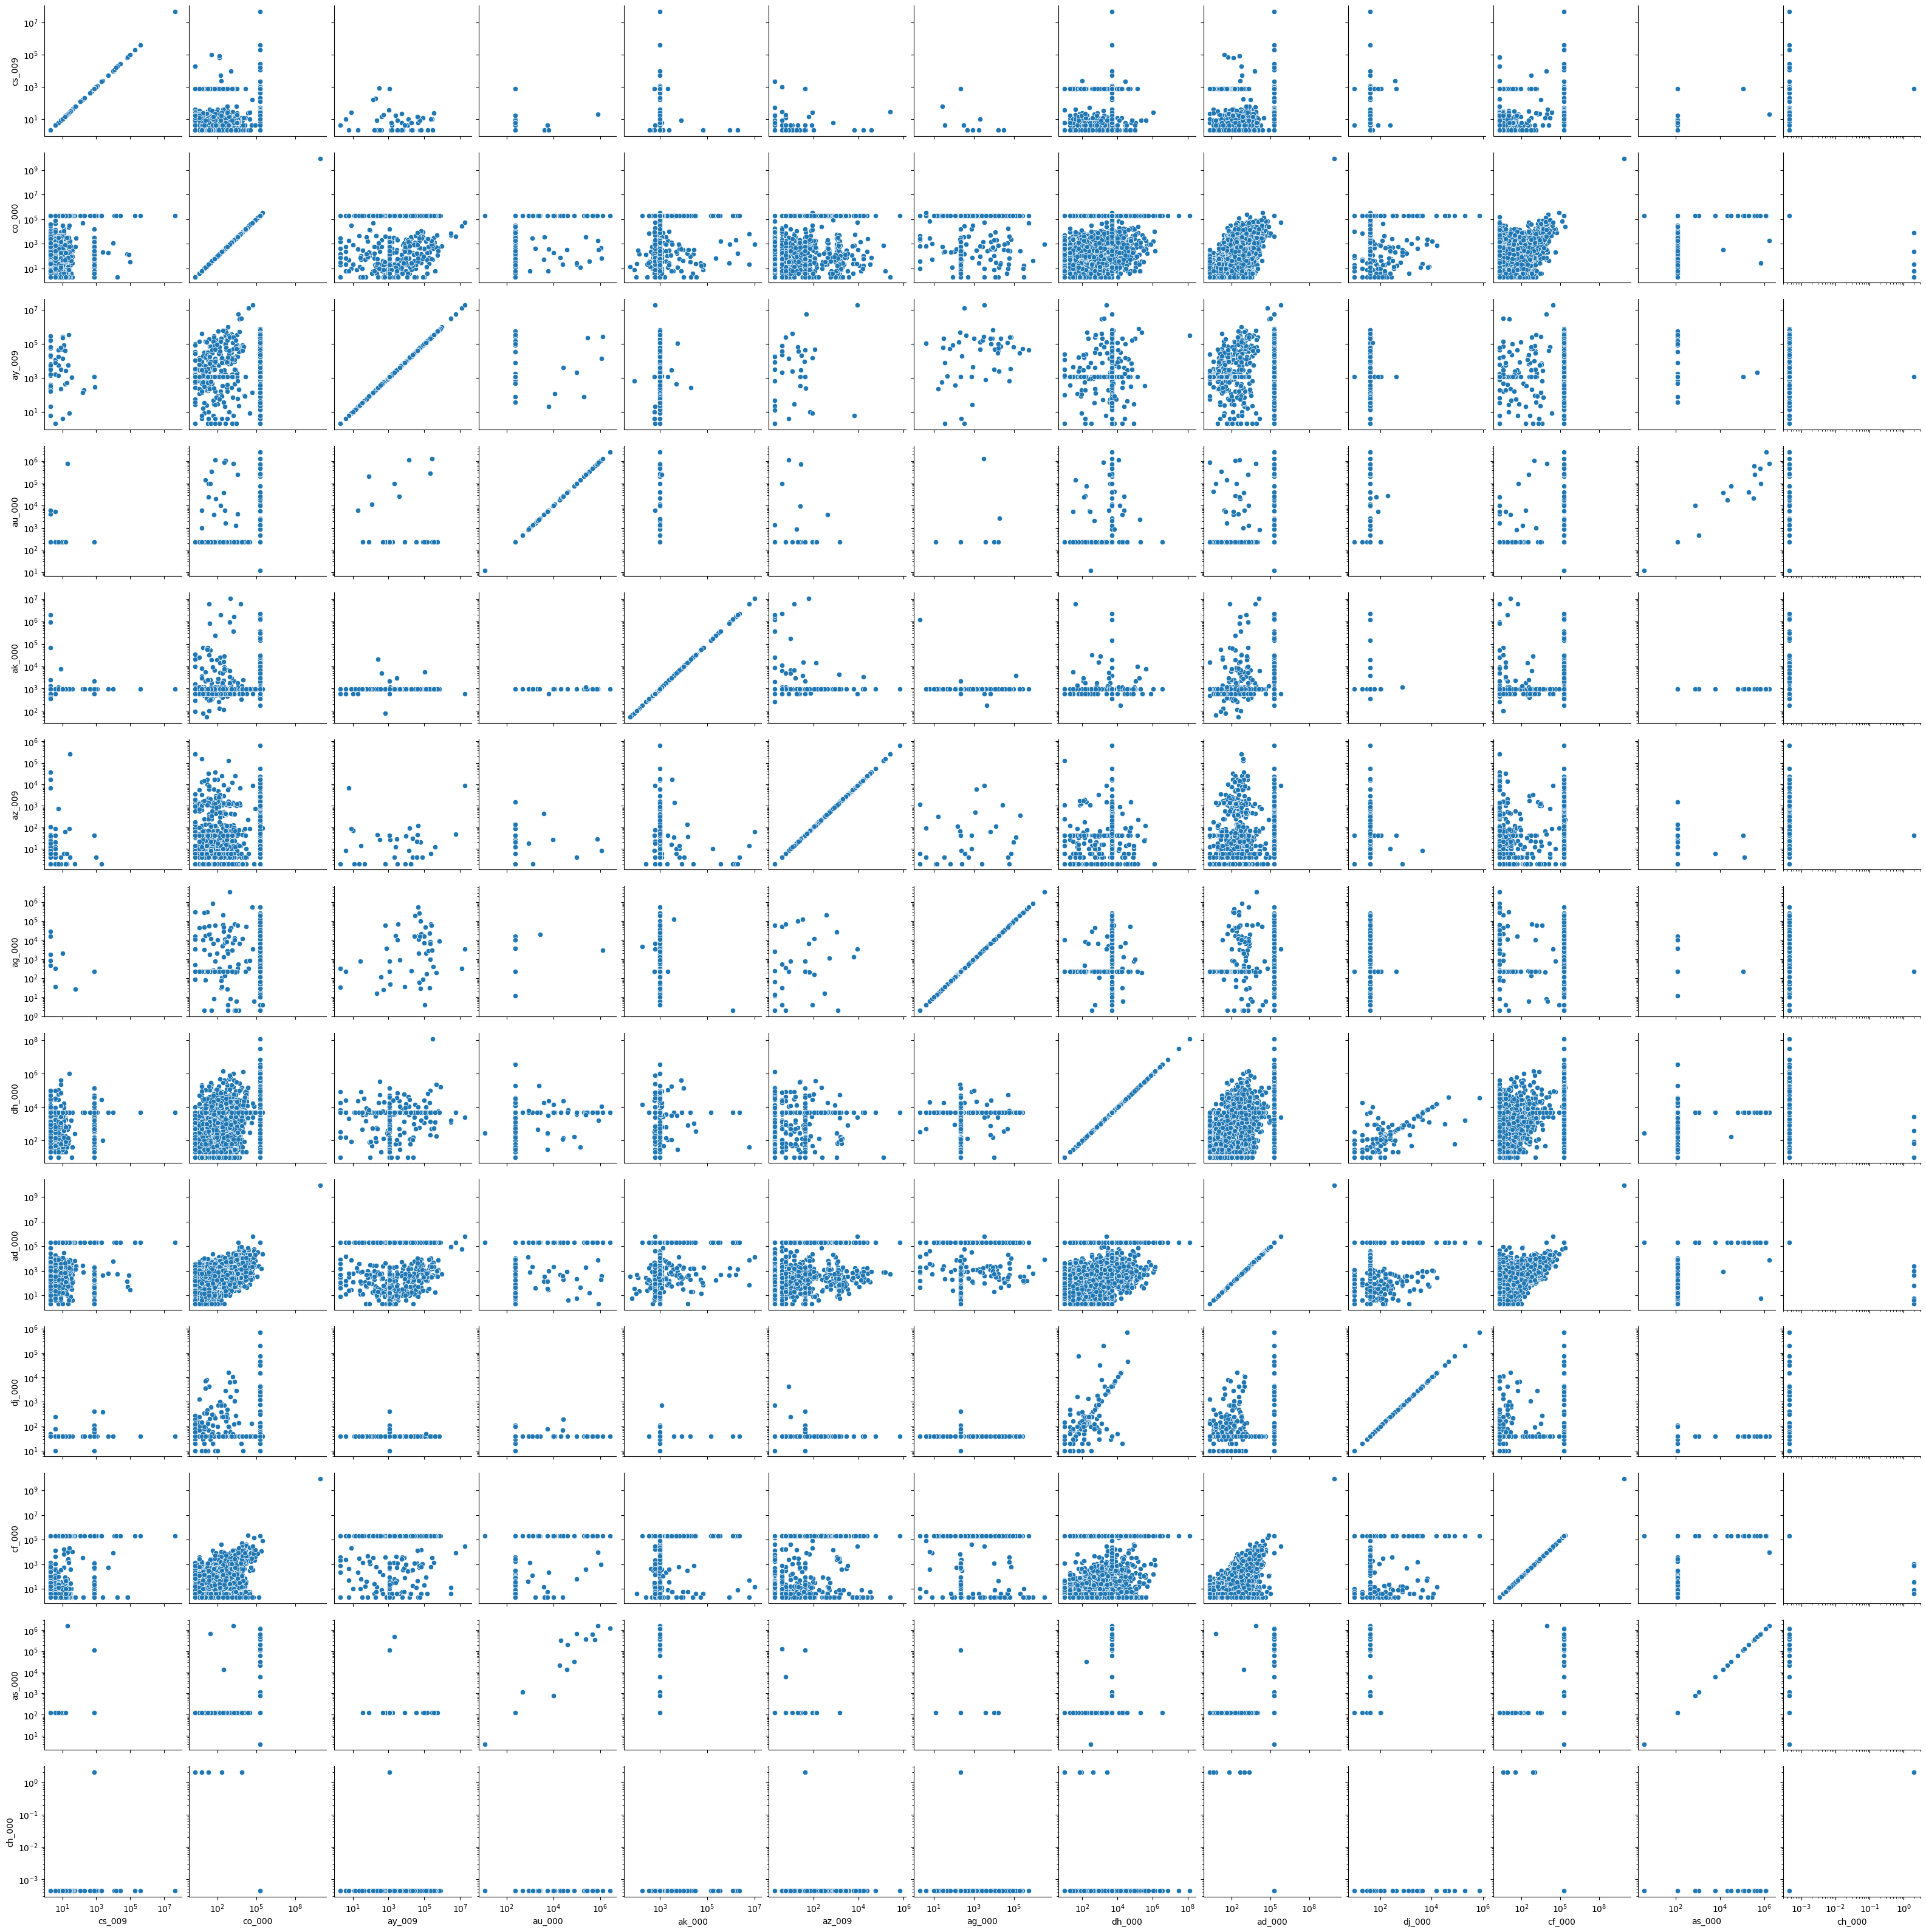

In [10]:
# make scatterplots
# top_features_train = [*list(top_features_train), (df_train.columns[0])] 
    # the selected features and y label concatenated together
# print(list(top_features_train))
df_imp_top_m = df_train_imp[list(top_features_train)]
# sns.pairplot(df_imp_top_m)
pairplots = sns.pairplot(df_imp_top_m, diag_kind=None)
pairplots.set(xscale="log", yscale="log")  # Use log scale for better display
plt.show()


[None]

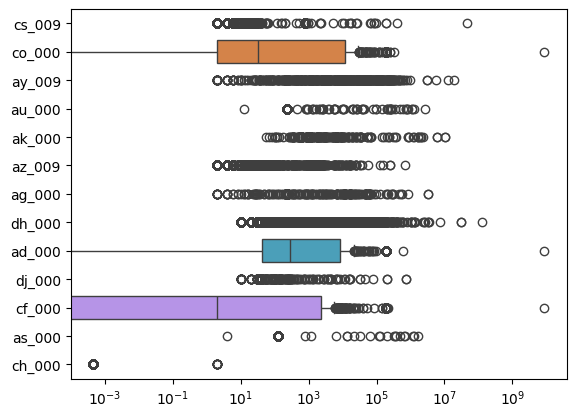

In [11]:
# Make box plots for top CV features
boxplots = sns.boxplot(data=df_imp_top_m, orient = 'h')
boxplots.set(xscale="log")  # Use log scale for better display result

We can't really see much from the above plots at this point.

#### (v) Is this data set imbalanced?

In [12]:
class_label_count = df_train_imp["class"].value_counts()
display(class_label_count)
print("percentage: ", class_label_count[1] / sum(class_label_count) * 100, "%")

class
0.0    59000
1.0     1000
Name: count, dtype: int64

percentage:  1.6666666666666667 %


Number of positive data is 59000; number of negative data is 1000. 

It is **highly imbalanced**. Only 1.67% of the whole training data is negative.

### (c) Train a random forest

**References**:

[RandomForestClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [13]:
# Divide Xs and Y label
X_train = df_train_imp.iloc[:, 1:]
y_train = df_train_imp.iloc[:, 0]
X_test = df_test_imp.iloc[:, 1:]
y_test = df_test_imp.iloc[:, 0]
X_train

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


Confusion Matrix for Train: 
[[58975    25]
 [  430   570]]

Accuracy Score for Train: 0.99242
Error for Train: 0.00758
AUC Score for Train: 0.78479


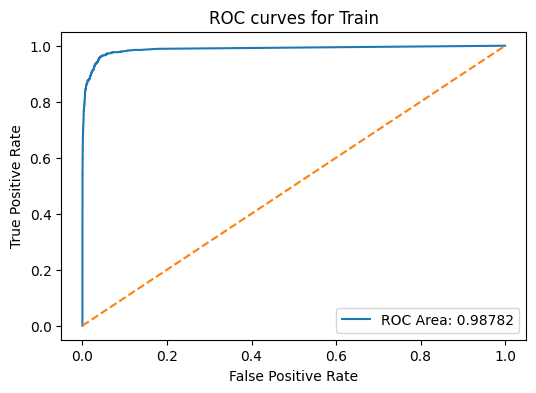

Confusion Matrix for Test: 
[[15612    13]
 [  172   203]]

Accuracy Score for Test: 0.98844
Error for Test: 0.01156
AUC Score for Test: 0.77025


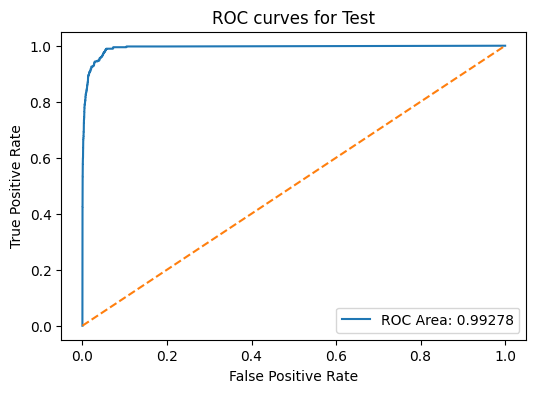

In [ ]:
def plot_CM_ROC(y, y_pred, y_prob, testOrTrain):
    
    # confusion matrix
    CM = confusion_matrix(y, y_pred)
    print(f'Confusion Matrix for {testOrTrain}: \n{CM}\n')

    # accuracy
    accuracy = round(accuracy_score(y, y_pred), 5)
    print(f'Accuracy Score for {testOrTrain}: {accuracy}')
    print(f'Error for {testOrTrain}: {round(1 - accuracy, 5)}')
    
    # ROC, AUC plot
    AUC = round(roc_auc_score(y, y_pred), 5)
    print(f'AUC Score for {testOrTrain}: {AUC}')
    
    fig, axes = plt.subplots(figsize = (6, 4))
    axes.set_title(f"ROC curves for {testOrTrain}")
    fpr, tpr, _ = roc_curve(y, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label = f"ROC Area: {round(roc_auc, 5)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()

    result = {"AUC": AUC, 'accuracy': accuracy, 'error': round(1 - accuracy, 5)}
    
    return CM, result

def fit_model_and_plot(model, X_train, y_train, X_test, y_test):
    #Train model
    model.fit(X_train, y_train)
    #model prediction result
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)

    results = {}
    _, results['train'] = plot_CM_ROC(y_train, y_train_pred, y_train_prob, "Train")
    test_CM, results['test'] = plot_CM_ROC(y_test, y_test_pred, y_test_prob, "Test")
    return model, test_CM, results

# build model and fit
model_RFC = RandomForestClassifier(max_depth = 5, 
                                  random_state = 60000, 
                                  oob_score = True)
model_RFC, test_CM, results = fit_model_and_plot(model_RFC, X_train, y_train, X_test, y_test)

In [18]:
train_oob_err = round(1 - model_RFC.oob_score_, 5)
print("Train OOB misclassification:", train_oob_err)

TN = test_CM[0][0]
FN = test_CM[1][0]
TP = test_CM[1][1]
FP = test_CM[0][1]
test_err = (FN + FP) / (TN + FN + TP + FP)
print("Test misclassification:", test_err)

Train OOB misclassification: 0.00902
Test misclassification: 0.0115625


### (d) Research class imbalance in random forest

**References**:

How class imbalance is addressed in random forests:

[Bagging and Random Forest for Imbalanced Classification](https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/)

[surviving-in-a-random-forest-with-imbalanced-datasets](https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb)

Methods:

1. Balanced Random Forest (BRF) :
   
    a. BRF makes class priors equal, either by downsampling or oversampling. BRF does this by iteratively drawing a bootstrap sample with equal proportions of data points from both the minority and the majority class.

2. SMOTE
    
    will be done later

***Notes**: 

resuse function `fit_model_and_plot` in 1 (c)

Confusion Matrix for Train: 
[[55632  3368]
 [   27   973]]

Accuracy Score for Train: 0.94342
Error for Train: 0.05658
AUC Score for Train: 0.95796


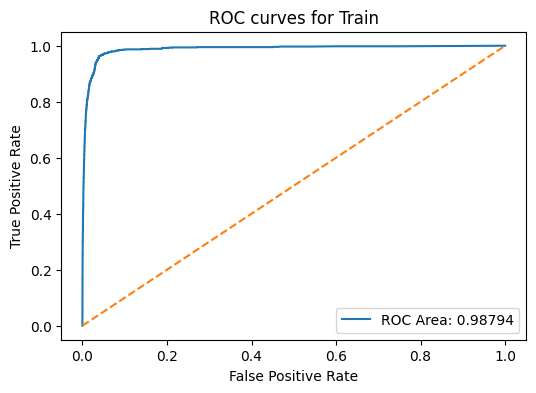

Confusion Matrix for Test: 
[[14770   855]
 [    7   368]]

Accuracy Score for Test: 0.94612
Error for Test: 0.05388
AUC Score for Test: 0.96331


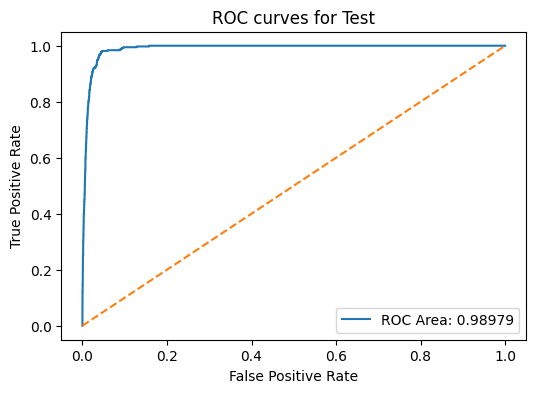

In [19]:
#Build BSRF model  and fit
model_BRFC = BalancedRandomForestClassifier(n_estimators=150, 
                                            max_depth = 5, 
                                            random_state = 60000, 
                                            oob_score = True)
model_BRFC, test_CM, results_BRFC = fit_model_and_plot(model_BRFC, X_train, y_train, X_test, y_test)

In [20]:
train_oob_err = round(1 - model_BRFC.oob_score_, 5)
print("Train OOB misclassification:", train_oob_err)

TN = test_CM[0][0]
FN = test_CM[1][0]
FP = test_CM[0][1]
TP = test_CM[1][1]
test_err = (FN + FP) / (TN + FN + FP + TP)
print("Test misclassification:", test_err)

Train OOB misclassification: 0.0405
Test misclassification: 0.053875


**Observations**:

1. From the printed confusion matrix results, we can see that, for **positive** cases, the performance of `BalancedRandomForestClassifier` excels standard `RandomForestClassifier`. 

2. The overall accuracy score for `BalancedRandomForestClassifier` is lower because the **negative** cases does not performe as good as the standard `RandomForestClassifier` and they(negative cases) consists of more than 98% of all cases. However this trade-off is worth it because positive cases are more crutial in this problem.

### (e) XGBoost and Model Trees

**References**:

1. [XGBoost Doc: Maths and equations](https://xgboost.readthedocs.io/en/stable/tutorials/model.html)
2. [XGBClassifier Doc](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)

In [21]:
# Preparations
# In xgboost, L1-regularization term is called alpha. 
# So we'll use alpha in the following code
alphas = {
    "reg_alpha": [10**i for i in range(-4, 4)]
    }
# print(alphas["reg_alpha"])

# scale data
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train), 
                              columns = X_train.columns)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test), 
                             columns = X_test.columns)

# build model
model_XGBC = XGBClassifier(objective = 'binary:logistic', 
                          colsample_bytree = 0.3,   # Subsample ratio of columns
                          learning_rate = 0.1, max_depth = 5)
# use grid Search to find the best alpha
gridcv_XGBC = GridSearchCV(model_XGBC, 
                      param_grid=alphas, n_jobs = -1, 
                      cv = KFold(n_splits = 5, shuffle = True, random_state = 60), 
                      scoring = "accuracy")

# Train it
gridcv_XGBC.fit(X_train_scaled, y_train)

# stats: best case in CV
best_alpha = gridcv_XGBC.best_params_['reg_alpha']
print('Best alpha: ', best_alpha)
best_accuracy =gridcv_XGBC.best_score_
print('Best train accuracy: ', round(best_accuracy, 5))

Best alpha:  0.01
Best train accuracy:  0.99393


Confusion Matrix for Train: 
[[58994     6]
 [   95   905]]

Accuracy Score for Train: 0.99832
Error for Train: 0.00168
AUC Score for Train: 0.95245


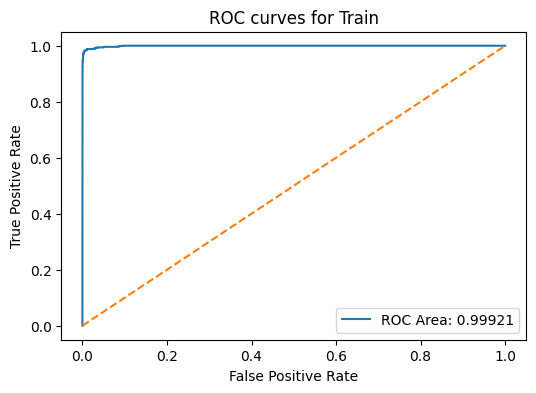

Confusion Matrix for Test: 
[[15601    24]
 [   97   278]]

Accuracy Score for Test: 0.99244
Error for Test: 0.00756
AUC Score for Test: 0.8699


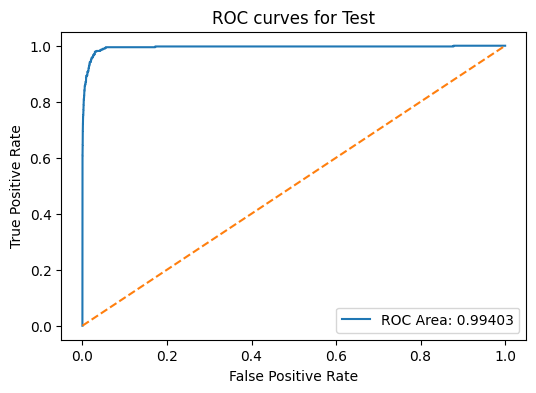

In [22]:
# build model and fit
model_xgb = XGBClassifier(objective = 'binary:logistic', 
                    reg_alpha = best_alpha, 
                    colsample_bytree = 0.3, 
                    learning_rate = 0.1, max_depth = 5)
_, _, results_xgb = fit_model_and_plot(model_xgb, X_train_scaled, y_train, X_test_scaled, y_test)

### (f) Use SMOTE to pre-process your data

In [ ]:
# Use pipeline to apply smote and XGBoost, then use Grid search
model_SMOTE = imbpipeline(steps = [["smote", SMOTE(random_state=5)],
                                   ["xgb", 
                                    XGBClassifier(objective = 'binary:logistic', 
                                                  colsample_bytree = 0.3,
                                                  learning_rate = 0.1, max_depth = 3)]])
# use grid Search to find the best alpha
alphas = {
    "xgb__reg_alpha": [10**i for i in range(-4, 4)]
    }
gridcv_SMOTE = GridSearchCV(estimator = model_SMOTE, 
                      param_grid=alphas, n_jobs = -1,   # re-use alphas in 1(e)
                      cv = KFold(n_splits = 5, shuffle = True, random_state = 80), 
                      scoring = "roc_auc")

# Train it
gridcv_SMOTE.fit(X_train_scaled, y_train)

# stats: best case in CV
best_alpha = gridcv_SMOTE.best_params_['xgb__reg_alpha']
print('Best alpha: ', best_alpha)
best_accuracy =gridcv_SMOTE.best_score_
print('Best train accuracy: ', round(best_accuracy, 5))

Best alpha:  0.1
Best train accuracy:  0.9866


Confusion Matrix for Train: 
[[57883  1117]
 [   72   928]]

Accuracy Score for Train: 0.98018
Error for Train: 0.01982
AUC Score for Train: 0.95453


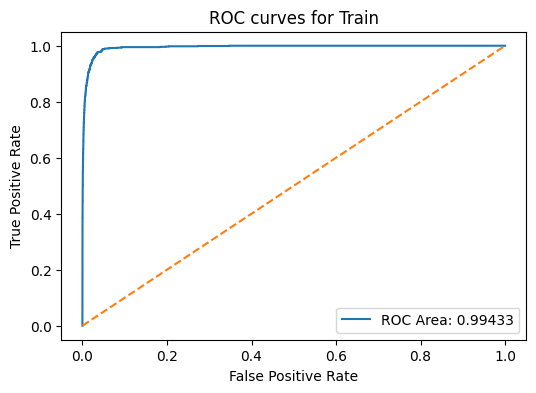

Confusion Matrix for Test: 
[[13602  2023]
 [    3   372]]

Accuracy Score for Test: 0.87338
Error for Test: 0.12662
AUC Score for Test: 0.93126


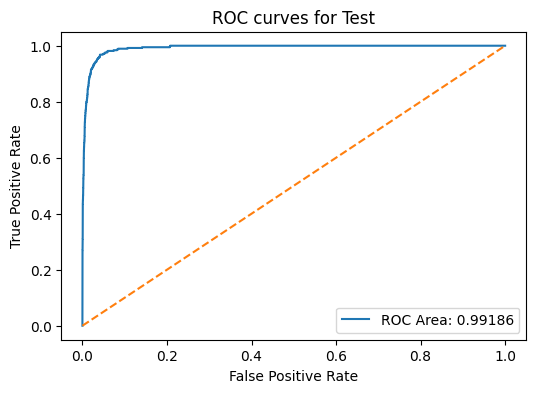

In [ ]:
# build model and fit
model_SMOTE = imbpipeline(steps = [["smote", SMOTE(random_state=5)],
                                   ["xgb", 
                                    XGBClassifier(objective = 'binary:logistic', 
                                                  colsample_bytree = 0.3,
                                                  reg_alpha = best_alpha,
                                                  learning_rate = 0.1, max_depth = 3)]])
_, _, results_SMOTE = fit_model_and_plot(model_SMOTE, X_train_scaled, y_train, X_test_scaled, y_test)

In [39]:
data = {
    ('XGBoost', 'train'): results_xgb['train'],
    ('XGBoost', 'test'): results_xgb['test'],
    ('SMOTE', 'train'): results_SMOTE['train'],
    ('SMOTE', 'test'): results_SMOTE['test'],
}

# Create DataFrame with MultiIndex
df = pd.DataFrame(data).T
df.index.names = ['Model', 'Dataset']
df

AUC  accuracy    error
Model   Dataset                            
XGBoost train    0.95245   0.99832  0.00168
        test     0.86990   0.99244  0.00756
SMOTE   train    0.95453   0.98018  0.01982
        test     0.93126   0.87338  0.12662

## 2. ISLR 6.6.3
<!-- ![Question ISLR 6.6.3](./pics/ISLR_6.6.3.png) -->
<img src="./pics/ISLR_6.6.3.png" alt="Question ISLR 6.6.3" width="500"/>

This problem discusses how the values will change in minimising RSS with a L1-penalized model (LASSO).

#### **(a)** 
**Steadily decrease** 

Reason: First, *s* is the constraint for the penalized term. When *s* increases, the constraint on $\beta$'s are relaxed, therefore *training RSS* decreases.
Second, When the exponential number q = 1 for the penalized term, the training RSS changes linearly ( = steadily).

#### **(b)**
**Decrease initially and then eventually starts increasing in a new shape**

Reason: 
When s -> 0, the constraints on $\beta$ s are too strict. The model is underfitted. 
When s -> $\infty$, the constraints on $\beta$ s are too relaxed. The model is overfitted. 
Test RSS reflects how the model reveals the truth relation. Knowing that, we can tell that when we increase *s*, the test RSS will decrease, and then increase.

#### **(c)**
**Steadily increases**

Reason:  s: 0 -> $\infty$ ;  model: underfitted -> overfitted ;  variance: 0 -> $\infty$

#### **(d)**
**Steadily decrease**

Reason: s: 0 -> $\infty$ ;  model: underfitted -> overfitted ;  bias: $\infty$ -> 0

Note: This also satisfies bias-variance trade-off.

#### **(e)**
**Remains constant**

Reason: 
Irreducible error is the 'act of god'. In the scope of this course we cannot control it. So it remains constant.

## 3. ISLR 6.6.5
<!-- ![Question ISLR 6.6.5](./pics/ISLR_6.6.5.png) -->
<img src="./pics/ISLR_6.6.5.png" alt="Question ISLR 6.6.5" width="600"/>


![a, b](./pics/IMG_2397.jpg)
![c, d](./pics/IMG_2398.jpg)

## 4. ISLR 8.4.5
<img src="./pics/ISLR_8.4.5.png" alt="Question ISLR 8.4.5" width="550"/>
<!-- ![Question ISLR 8.4.5](./pics/ISLR_8.4.5.png) -->


1. **Majority vote approach**:
    4 votes - GREEN; 
    6 votes - RED; 

    => RED
2. **Average probability approach**:
    ave 
    = (0.1 + 0.15 + 0.2+ 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10
    = 0.45
    
    => GREEN

## 5. ISLR 9.7.3
<img src="./pics/ISLR_9.7.3.png" alt="Question ISLR 9.7.3" width="550"/>
<!-- ![Question ISLR 9.7.3](./pics/ISLR_9.7.3.png) -->

![a, b, c, d](./pics/IMG_2399.jpg)
![e, f](./pics/IMG_2400.jpg)
![g, h](./pics/IMG_2402.jpg)